## Esercitazione 6  del    27 Marzo 2023 


In [113]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
import scipy.linalg as spl
import math

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=1,..,10.
Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
condizionato per tutti i valori di q assegnati;

In [114]:
p = sym.symbols('p')
q = sym.symbols('q')
p = 10**5
for i in range(1, 11):
    q = 10**-i
    print(-p + sym.sqrt(p**2 + q))

5.00003807246685e-7
5.00003807246685e-8
4.99130692332983e-9
4.94765117764473e-10
4.36557456851006e-11
1.45519152283669e-11
0
0
0
0


## Esercizio 2
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [115]:
def myNormaInfinito(A):
    return np.max(np.sum(np.abs(A), axis=1))

def myNorma1(A):
    return np.max(np.sum(np.abs(A), axis=0))

testA = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(myNorma1(testA))
print(myNormaInfinito(testA))
print(np.linalg.norm(testA, 1))
print(np.linalg.norm(testA, np.inf))

18
24
18.0
24.0


## Esercizio 3
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [116]:
def myNorma2vet(A):
    return np.sqrt(np.max(np.sum(np.abs(A)**2, axis=0)))
#myNorma2mat funziona sia per matrici che per vettori
def myNorma2mat(A):
    return np.sqrt(np.max(np.linalg.eigvals(np.dot(A.T, A))))

testVetA = np.array([[1], [2], [3]])

print(myNorma2vet(testA)) #non va bene perché è una matrice
print(myNorma2mat(testA))
print(myNorma2vet(testVetA))
print(myNorma2mat(testVetA))

11.224972160321824
16.848103352614213
3.7416573867739413
3.7416573867739413


## Esercizio 4 
Implementare il calcolo dell'indice di condizionamento in norma 2 di una matrice A come rapporto tra la radice dell'autovalore massimo di $A^TA$ e la radice dell'autovalore minimo di $A^TA$.

In [117]:
def conditionNumber(A):
    return np.sqrt(np.max(np.linalg.eigvals(np.dot(A.T, A))))/np.sqrt(np.min(np.linalg.eigvals(np.dot(A.T, A))))

print(conditionNumber(testA))
print(np.linalg.cond(testA))


523487829.45718247
5.0522794445385096e+16


## Esercizio 5
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma 1 senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1)
- perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [118]:
vandermonde = np.vander(np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0]), increasing=True)
print(np.linalg.cond(vandermonde, 1))
print(myNorma1(vandermonde)*myNorma1(npl.inv(vandermonde)))

b = np.sum(vandermonde, axis=1).reshape(6, 1)
print(b)
bp = b.copy()
bp[0] = bp[0] + 0.025
erroreDati = np.linalg.norm(bp - b, np.inf)/np.linalg.norm(b, np.inf)
print(erroreDati)

solEsatta = np.ones((6,1))
solPerturbata = npl.solve(vandermonde, bp)
print(solEsatta)
print(solPerturbata)

erroreSol = np.linalg.norm(solPerturbata - solEsatta, np.inf)/np.linalg.norm(solEsatta, np.inf)
print(erroreSol)

1281105.0000000778
1281105.0000000778
[[6.000e+00]
 [6.300e+01]
 [3.640e+02]
 [1.365e+03]
 [3.906e+03]
 [9.331e+03]]
2.679241238881187e-06
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[1.15      ]
 [0.7825    ]
 [1.12083333]
 [0.96770833]
 [1.00416667]
 [0.99979167]]
0.21749999997867098


## Esercizio 6
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [119]:
A = np.array([[6, 63, 662.2],[63, 662.2, 6967.8],[662.2, 6967.8, 73393.5664]])
b = np.array([[1.1], [2.33], [1.7]])
X = spl.solve(A,b)
dA = 0.01*np.array([[1,0,0],[0,0,0],[0,0,0]])
X_perturbed = spl.solve(A+dA,b)
errRel = abs(X-X_perturbed)/abs(X)

print("Solution without perturbation: \n", X)
print("\nSolution with perturbation: \n", X_perturbed)
print("\nRelative error: \n", errRel)

Solution without perturbation: 
 [[136422.3375037 ]
 [-25999.49955428]
 [  1237.44419646]]

Solution with perturbation: 
 [[67.09867276]
 [-9.66739506]
 [ 0.3124175 ]]

Relative error: 
 [[0.99950815]
 [0.99962817]
 [0.99974753]]


## Esercizio 7
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [120]:
from scipy.linalg import hilbert
A = hilbert(4)
b = np.array([1,1,1,1])
X = spl.solve(A,b)
dB = 0.01*np.array([[1],[-1],[1],[-1]])
X_perturbed = spl.solve(A,b+dB)
errRel = abs(X-X_perturbed)/abs(X)

print("Solution without perturbation: \n", X)
print("\nSolution with perturbation: \n", X_perturbed)
print("\nRelative error: \n", errRel)

Solution without perturbation: 
 [  -4.   60. -180.  140.]

Solution with perturbation: 
 [[  1.16   1.16   1.16   1.16]
 [  3.     3.     3.     3.  ]
 [-43.8  -43.8  -43.8  -43.8 ]
 [ 51.8   51.8   51.8   51.8 ]]

Relative error: 
 [[ 1.29        0.98066667  1.00644444  0.99171429]
 [ 1.75        0.95        1.01666667  0.97857143]
 [ 9.95        1.73        0.75666667  1.31285714]
 [13.95        0.13666667  1.28777778  0.63      ]]


## Esercizio 8
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$. 

In [121]:
def esp_taylor_stabile(x,N):
    
    if x<0:
        x=abs(x)
        r=x
        fattoriale=1
        esponential=1+r
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i
            esponential=esponential+r/fattoriale
    
        return 1/esponential
    
    else: 

        r=x
        fattoriale=1
        esponential=1+r
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i
            esponential=esponential+r/fattoriale
        return esponential

[1.49257138e-16 2.19634530e-16 1.61598056e-16 7.13383232e-16
 0.00000000e+00 2.57455791e-16 3.78850770e-16 2.78742819e-16
 2.05087505e-16 1.50894954e-16 0.00000000e+00 1.63371290e-16
 2.40403756e-16 3.53758398e-16 5.20561767e-16 1.91503972e-16
 0.00000000e+00 6.22013862e-16 1.52550741e-16 0.00000000e+00
 3.30327965e-16]


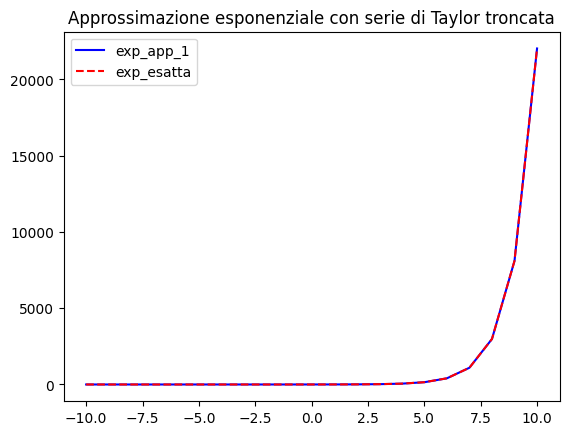

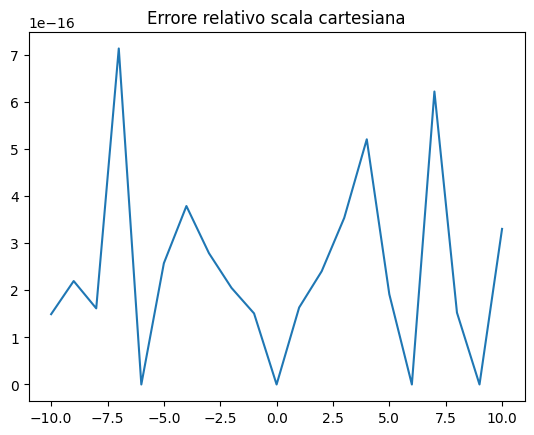

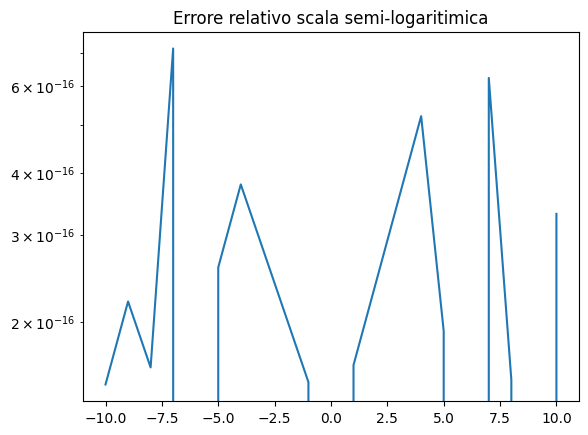

[1.49257138e-16 2.19634530e-16 1.61598056e-16 7.13383232e-16
 0.00000000e+00 2.57455791e-16 3.78850770e-16 2.78742819e-16
 2.05087505e-16 1.50894954e-16 0.00000000e+00 1.63371290e-16
 2.40403756e-16 3.53758398e-16 5.20561767e-16 1.91503972e-16
 0.00000000e+00 6.22013862e-16 1.52550741e-16 0.00000000e+00
 3.30327965e-16]


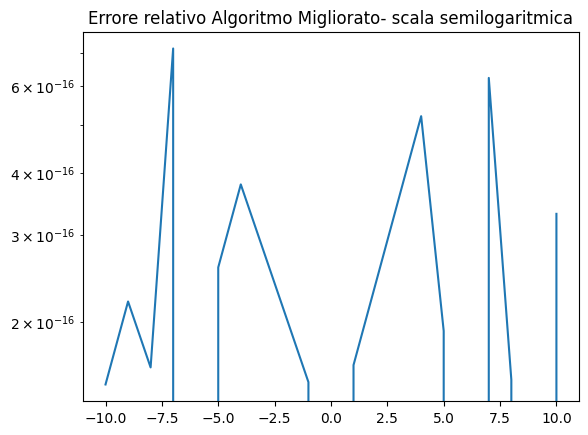

In [122]:
a=-10               
b=10                
ncampio=21
N=100

xc= np.linspace(a,b,ncampio)
exp_es=np.exp(xc); #esponenziale esatto


exp_app=np.zeros((ncampio,)); 
nt=np.zeros((ncampio,));     #indice n della serie

for i in range(ncampio):
    exp_app[i]= esp_taylor_stabile(xc[i],N)


err_rel=np.abs(exp_app-exp_es)/np.abs(exp_es)

print(err_rel)
plt.plot(xc,exp_app,'b-',xc,exp_es,'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()



plt.plot(xc,err_rel)
plt.title("Errore relativo scala cartesiana")
plt.show()


plt.plot(xc,err_rel)
plt.yscale("log")
plt.title("Errore relativo scala semi-logaritimica")
plt.show()

#Si nota che l'errore relativo risulta più alto nel caso di esponente negativo, perchè lo sviluppo in serie
#presenta termini a segno alterno, e sappiamo che in situazioni particolari la somma tra numeri a segno alterno
#può provocare la cancellazione di cifre significative e produrre quindi un algoritmo instabile
'''
--------------------------------------------------------------------------
come migliorare andamento errore relativo
--------------------------------------------------------------------------
'''
#Pe realizzare un aglrotimo stabile si considera il fatto che exp(-x)= 1/exp(x).
#Si calcola quindi lo sviluppo in serie troncato ad n termini di exp(abs(x)) e poi se ne considera il reciproco.

for i in range(ncampio) :
       exp_app[i]= esp_taylor_stabile(xc[i],N)
   

err_rel_2=np.abs(exp_app-exp_es)/np.abs(exp_es)
print(err_rel_2)
plt.plot(xc,err_rel_2)
plt.yscale("log")
plt.title('Errore relativo Algoritmo Migliorato- scala semilogaritmica')
plt.show()

## Esercizio 9
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

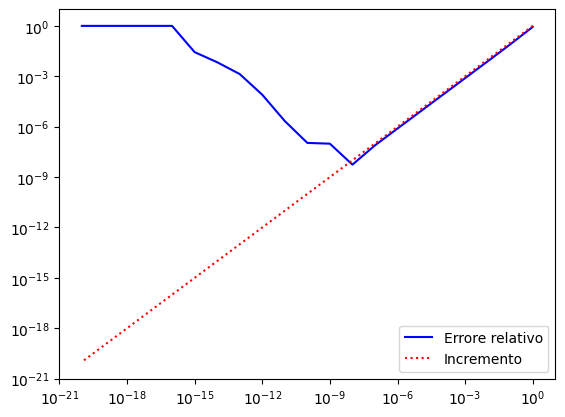

In [123]:
k=np.arange(0,-21,-1)
h=10.0**k

des=math.cos(1);            #derivata esatta


x=1
rai=(np.sin(x+h)-np.sin(x))/h #rapporto incrementale

err_rel=np.abs(rai-des)/np.abs(des); # errore relativo


plt.plot(h,err_rel,'b-',h,h,'r:')
plt.xscale("log")
plt.yscale("log")
plt.legend(['Errore relativo', 'Incremento'])